In [1]:
#DATA WRAGGLING

In [2]:
import pandas as pd
import numpy as np

In [3]:
sale_data = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [4]:
sale_data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [5]:
sale_data.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [6]:
sale_data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [7]:
sale_data.info

<bound method DataFrame.info of              Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]>

In [8]:
sale_data.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [9]:
missing_values = sale_data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [10]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [11]:
if 'Sales' in sale_data.columns:
    # Use the natural logarithm to create a new feature 'Log_Price'
    sale_data['Log_Price'] = sale_data['Sales'].apply(lambda x: np.log(x))

    # Normalize 'price' column and create a new feature 'Normalized_Price'
    sale_data['Sales_transformation'] = (sale_data['Sales'] - sale_data['Sales'].min()) / (sale_data['Sales'].max() - sale_data['Sales'].min())

    # Displaying the DataFrame with the new features
    print("sale_data with new features:")
    print(sale_data)
else:
    print("The 'Sales' column does not exist in the DataFrame.")

sale_data with new features:
             Date        Time State     Group  Unit  Sales  Log_Price  \
0      1-Oct-2020     Morning    WA      Kids     8  20000   9.903488   
1      1-Oct-2020     Morning    WA       Men     8  20000   9.903488   
2      1-Oct-2020     Morning    WA     Women     4  10000   9.210340   
3      1-Oct-2020     Morning    WA   Seniors    15  37500  10.532096   
4      1-Oct-2020   Afternoon    WA      Kids     3   7500   8.922658   
...           ...         ...   ...       ...   ...    ...        ...   
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000  10.463103   
7556  30-Dec-2020     Evening   TAS      Kids    15  37500  10.532096   
7557  30-Dec-2020     Evening   TAS       Men    15  37500  10.532096   
7558  30-Dec-2020     Evening   TAS     Women    11  27500  10.221941   
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500  10.388995   

      Sales_transformation  
0                 0.095238  
1                 0.095238  
2      

In [12]:
# Remove duplicates
data_cleaned = sale_data.drop_duplicates()

In [13]:
# Export the cleaned dataset
data_cleaned.to_csv('Cleaned_AusApparalSales4thQrt2020.csv', index=False)

In [14]:
sale_data.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'Log_Price',
       'Sales_transformation'],
      dtype='object')

In [15]:
sale_data['Group'].value_counts()

 Kids       1890
 Men        1890
 Women      1890
 Seniors    1890
Name: Group, dtype: int64

In [16]:
sale_data['Unit'].value_counts()

9     406
10    402
6     370
8     369
7     362
     ... 
53      9
61      9
54      9
60      7
58      5
Name: Unit, Length: 64, dtype: int64

In [17]:
sale_data.groupby('State')[['Unit','Sales']].sum()

,Unit,Sales
State,,
NSW,29988,74970000
NT,9032,22580000
QLD,13367,33417500
SA,23543,58857500
TAS,9104,22760000
VIC,42226,105565000
WA,8861,22152500


In [18]:
sale_data.groupby('Time')[['Unit' , 'Sales']].sum()

,Unit,Sales
Time,,
Afternoon,45603,114007500
Evening,44835,112087500
Morning,45683,114207500


In [19]:
sale_data.groupby('Date')[['Sales', 'Unit']].sum()

,Sales,Unit
Date,,
1-Dec-2020,4465000,1786
1-Nov-2020,3020000,1208
1-Oct-2020,3720000,1488
10-Dec-2020,4717500,1887
10-Nov-2020,2992500,1197
...,...,...
8-Nov-2020,3210000,1284
8-Oct-2020,3945000,1578
9-Dec-2020,4655000,1862


In [20]:
sale_data.groupby(['Group', 'State'])[['Sales', 'Unit']].sum()

Sales   Unit
Group    State                 
 Kids     NSW   18587500   7435
          NT     5700000   2280
          QLD    8510000   3404
          SA    14515000   5806
          TAS    5775000   2310
          VIC   26360000  10544
          WA     5625000   2250
 Men      NSW   19022500   7609
          NT     5762500   2305
          QLD    8392500   3357
          SA    14655000   5862
          TAS    5757500   2303
          VIC   26407500  10563
          WA     5752500   2301
 Seniors  NSW   18187500   7275
          NT     5465000   2186
          QLD    8190000   3276
          SA    14717500   5887
          TAS    5650000   2260
          VIC   26315000  10526
          WA     5512500   2205
 Women    NSW   19172500   7669
          NT     5652500   2261
          QLD    8325000   3330
          SA    14970000   5988
          TAS    5577500   2231
          VIC   26482500  10593
          WA     5262500   2105

In [21]:
sale_data.groupby(['Time', 'State'])[['Sales', 'Unit']].sum()

Sales   Unit
Time       State                 
 Afternoon  NSW   25110000  10044
            NT     7510000   3004
            QLD   11347500   4539
            SA    20025000   8010
            TAS    7670000   3068
            VIC   35062500  14025
            WA     7282500   2913
 Evening    NSW   24712500   9885
            NT     7627500   3051
            QLD   10632500   4253
            SA    19367500   7747
            TAS    7565000   3026
            VIC   34880000  13952
            WA     7302500   2921
 Morning    NSW   25147500  10059
            NT     7442500   2977
            QLD   11437500   4575
            SA    19465000   7786
            TAS    7525000   3010
            VIC   35622500  14249
            WA     7567500   3027

In [22]:
import statistics
statistics.mean(sale_data['Sales'])

45013.5582010582

In [23]:
statistics.mode(sale_data['Sales'])

22500

In [24]:
statistics.median(sale_data['Sales'])

35000.0

In [25]:
statistics.stdev (sale_data['Sales'])

32253.506943966073

In [26]:
import statistics
statistics.mean(sale_data['Unit'])

18.00542328042328

In [27]:
statistics.mode(sale_data['Unit'])

9

In [28]:
statistics.median(sale_data['Unit'])

14.0

In [29]:
statistics.stdev(sale_data['Unit'])

12.901402777586428

In [64]:
group_by_sale = sale_data.groupby('Group')['Sales'].sum()
group_by_sale

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

In [31]:
group_by_sale.max()

85750000

In [32]:
group_by_sale.min()

84037500

In [33]:
sale_data.groupby('Date')['Sales'].sum()

Date
1-Dec-2020     4465000
1-Nov-2020     3020000
1-Oct-2020     3720000
10-Dec-2020    4717500
10-Nov-2020    2992500
                ...   
8-Nov-2020     3210000
8-Oct-2020     3945000
9-Dec-2020     4655000
9-Nov-2020     2925000
9-Oct-2020     3645000
Name: Sales, Length: 90, dtype: int64

In [34]:
sale_data['Date'] = pd.to_datetime(sale_data['Date'])

In [35]:
sale_data['Week'] = sale_data['Date'].dt.isocalendar().week


In [36]:
sale_data['Month'] = sale_data['Date'].dt.month

In [37]:
sale_data['Quarter'] = sale_data['Date'].dt.quarter

In [38]:
weekly_report = sale_data.groupby('Week')[['Sales','Unit']].sum()
weekly_report

,Sales,Unit
Week,,
40,15045000,6018
41,27002500,10801
42,26640000,10656
43,26815000,10726
44,21807500,8723
45,20865000,8346
46,21172500,8469
47,21112500,8445
48,21477500,8591


In [39]:
monthly_report = sale_data.groupby('Month')[['Sales','Unit']].sum()
monthly_report

,Sales,Unit
Month,,
10,114290000,45716
11,90682500,36273
12,135330000,54132


In [40]:
quarterly_report = sale_data.groupby('Quarter')[['Sales','Unit']].sum()
quarterly_report

,Sales,Unit
Quarter,,
4,340302500,136121


In [41]:
weekly_report.index

Index([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53], dtype='UInt32', name='Week')

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

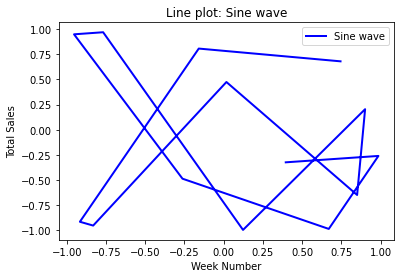

In [44]:



x = np.sin(weekly_report.index)
y = np.sin(weekly_report['Sales'])

plt.plot(x, y, label='Sine wave', color='blue', linestyle='-', linewidth=2)

plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.title('Line plot: Sine wave')

plt.legend()

plt.show()

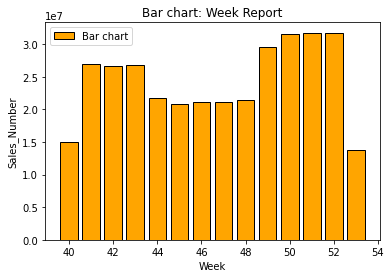

In [49]:
Week = weekly_report.index
Sales_Number = weekly_report['Sales']

plt.bar(Week,Sales_Number, color='orange', edgecolor='black', label='Bar chart')

plt.xlabel('Week')
plt.ylabel('Sales_Number')
plt.title('Bar chart: Week Report')

plt.legend()

plt.show()

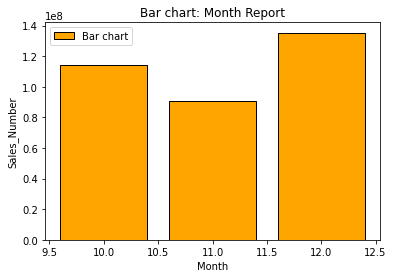

In [47]:

Month = monthly_report.index
Sales_Number = monthly_report['Sales']

plt.bar(Month,Sales_Number, color='orange', edgecolor='black', label='Bar chart')

plt.xlabel('Month')
plt.ylabel('Sales_Number')
plt.title('Bar chart: Month Report')

plt.legend()

plt.show()


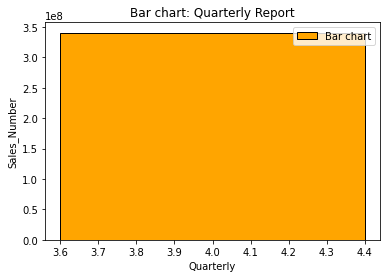

In [48]:
Quarterly = quarterly_report.index
Sales_Number = quarterly_report['Sales']

plt.bar(Quarterly,Sales_Number, color='orange', edgecolor='black', label='Bar chart')

plt.xlabel('Quarterly')
plt.ylabel('Sales_Number')
plt.title('Bar chart: Quarterly Report')

plt.legend()

plt.show()

In [56]:
statewise_sales = sale_data.groupby(["State", "Group"])['Sales'].sum().unstack()
statewise_sales

Group,Kids,Men,Seniors,Women
State,,,,
NSW,18587500,19022500,18187500,19172500
NT,5700000,5762500,5465000,5652500
QLD,8510000,8392500,8190000,8325000
SA,14515000,14655000,14717500,14970000
TAS,5775000,5757500,5650000,5577500
VIC,26360000,26407500,26315000,26482500
WA,5625000,5752500,5512500,5262500


Text(0, 0.5, 'Total Sales ($)')

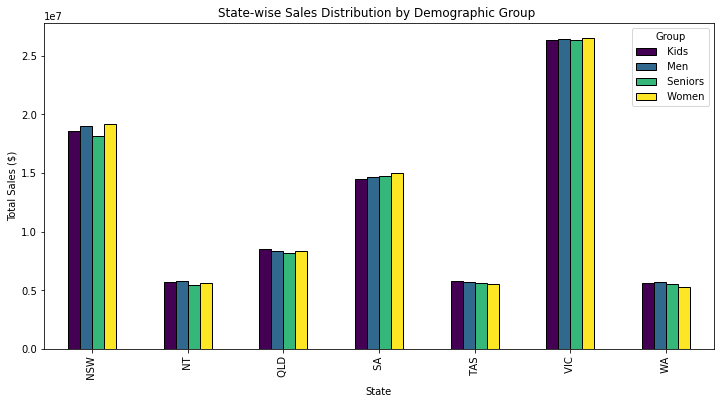

In [61]:
statewise_sales.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("State-wise Sales Distribution by Demographic Group ")
plt.xlabel("State")
plt.ylabel("Total Sales ($)")


In [65]:
groupwise_sales = sale_data.groupby(["Group", "State"])['Sales'].sum().unstack()
groupwise_sales

State,NSW,NT,QLD,SA,TAS,VIC,WA
Group,,,,,,,
Kids,18587500,5700000,8510000,14515000,5775000,26360000,5625000
Men,19022500,5762500,8392500,14655000,5757500,26407500,5752500
Seniors,18187500,5465000,8190000,14717500,5650000,26315000,5512500
Women,19172500,5652500,8325000,14970000,5577500,26482500,5262500


Text(0, 0.5, 'Total Sales ($)')

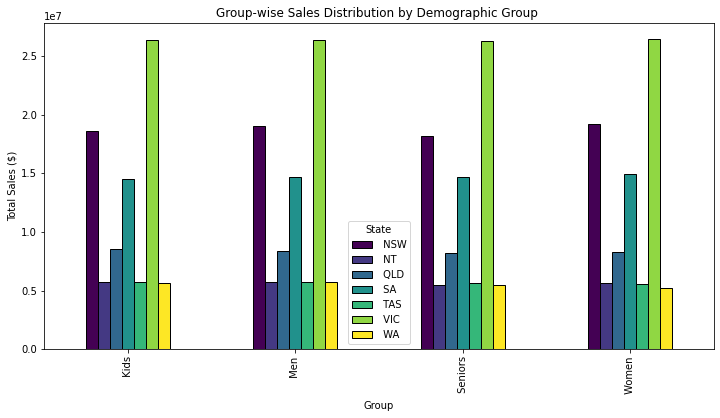

In [67]:
groupwise_sales.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Group-wise Sales Distribution by Demographic Group ")
plt.xlabel("Group")
plt.ylabel("Total Sales ($)")


In [80]:
timewise_sales = sale_data.groupby("Time")["Sales"].sum()
timewise_sales

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, ' Afternoon'), Text(1, 0, ' Evening'), Text(2, 0, ' Morning')])

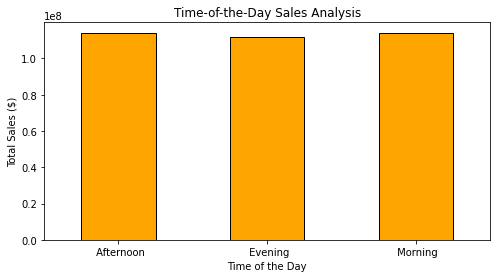

In [87]:
timewise_sales.plot(kind="bar", figsize=(8, 4), color="orange", edgecolor="black")
plt.title("Time-of-the-Day Sales Analysis")
plt.xlabel("Time of the Day")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0)



In [ ]:
RECCOMENDATION :-
1] Matplotlib allows for clear, high-quality bar charts, which are suitable for comparing sales across states and different times of the day, helping S&M teams for effective decision
making .
2] Matplotlib integrates well with Pandas for easy data manipulation .